In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization, GlobalMaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

Using TensorFlow backend.


In [2]:
def plot_cat_dog(pred):
    plt.rcParams['figure.figsize'] = [15, 15]
    ax = plt.subplot(1,2,1)

    classes = ('Cat','Dog')
    y_pos = np.arange(len(classes))

    plt.subplot(1,2,1)
    ax.barh(y_pos, pred, align='center')
    ax.set_yticks(y_pos)
    ax.set_yticklabels(classes)
    ax.invert_yaxis()  # labels read top-to-bottom
    ax.set_xlabel('Probability')
    ax.set_title('Cat or dog?')
    ax.set_aspect(0.43)

    plt.subplot(1,2,2)
    plt.imshow(img)

    plt.show()

In [3]:
model = Sequential()
model.add(Conv2D(96, (3, 3), input_shape=(150, 150, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(80, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  
model.add(Dense(96, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 96)      2688      
_________________________________________________________________
batch_normalization_1 (Batch (None, 148, 148, 96)      384       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 96)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 80)        69200     
_________________________________________________________________
batch_normalization_2 (Batch (None, 72, 72, 80)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 80)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 64)        46144     
__________

# Training

In [5]:
batch_size = 32

train_datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest',        
        rescale=1./255)
#        shear_range=0.2,
#        zoom_range=0.2,
#        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory('data/train', target_size=(150, 150), batch_size=batch_size, class_mode='binary')  

validation_generator = test_datagen.flow_from_directory('data/validation',target_size=(150, 150),batch_size=batch_size,class_mode='binary')

Found 10250 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [6]:
history = model.fit_generator(
        train_generator,
        steps_per_epoch=10250 // batch_size,
        epochs=50,
        validation_data=validation_generator,
        validation_steps=1000 // batch_size)
#model.save_weights('first_try.h5')

Epoch 1/50
320/320 [==============================] - 40s 125ms/step - loss: 2.1369 - acc: 0.5650 - val_loss: 0.9050 - val_acc: 0.6038
Epoch 2/50
320/320 [==============================] - 39s 121ms/step - loss: 1.0967 - acc: 0.6189 - val_loss: 0.8810 - val_acc: 0.6023
Epoch 3/50
320/320 [==============================] - 39s 122ms/step - loss: 1.0074 - acc: 0.6334 - val_loss: 0.6559 - val_acc: 0.6488
Epoch 4/50
320/320 [==============================] - 39s 123ms/step - loss: 0.9572 - acc: 0.6520 - val_loss: 1.3002 - val_acc: 0.5961
Epoch 5/50
320/320 [==============================] - 39s 122ms/step - loss: 0.6433 - acc: 0.6704 - val_loss: 0.8110 - val_acc: 0.6198
Epoch 6/50
320/320 [==============================] - 39s 121ms/step - loss: 0.5954 - acc: 0.6876 - val_loss: 0.6256 - val_acc: 0.6353
Epoch 7/50
320/320 [==============================] - 39s 121ms/step - loss: 0.5789 - acc: 0.6949 - val_loss: 0.7755 - val_acc: 0.7087
Epoch 8/50
320/320 [==============================] - 3

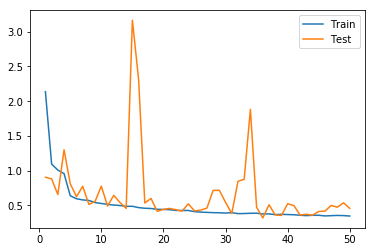

In [7]:
trainplot = plt.plot(range(1,51), history.history['loss'], label="Train")
testplot = plt.plot(range(1,51), history.history['val_loss'], label="Test")
plt.legend(handles=[trainplot[0], testplot[0]])
plt.show()

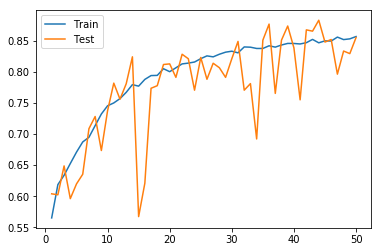

In [8]:
trainplot = plt.plot(range(1,51), history.history['acc'], label="Train")
testplot = plt.plot(range(1,51), history.history['val_acc'], label="Test")
plt.legend(handles=[trainplot[0], testplot[0]])
plt.show()

# Testing

In [4]:
model.load_weights('cats_dogs.h5')

In [5]:
img = load_img('data/validation/cats/cat.2007.jpg')

In [6]:
img2 = img.resize(size=(150,150))
x = img_to_array(img2)  
x = x.reshape((1,) + x.shape)

In [7]:
pred_dog = model.predict_proba(x)[0][0]
pred_cat = 1-pred_dog

/home/deepdell/.local/lib/python3.6/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


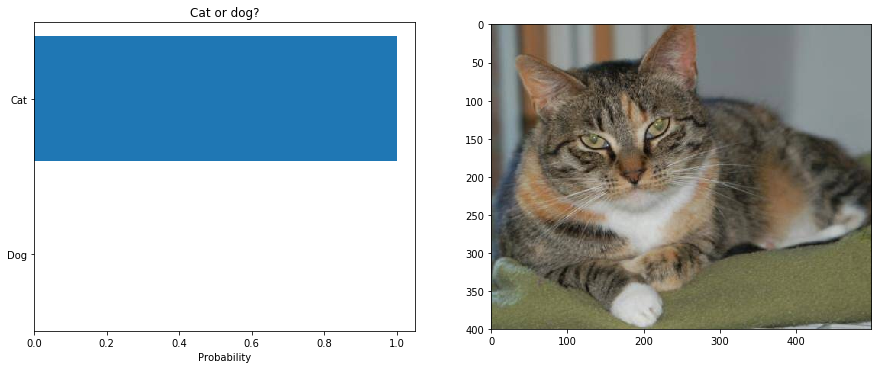

In [8]:
plot_cat_dog([pred_cat,pred_dog]) 

In [9]:
img = load_img('data/validation/dogs/dog.2008.jpg')

In [10]:
img2 = img.resize(size=(150,150))
x = img_to_array(img2)  
x = x.reshape((1,) + x.shape)

In [11]:
pred_dog = model.predict_proba(x)[0][0]
pred_cat = 1-pred_dog

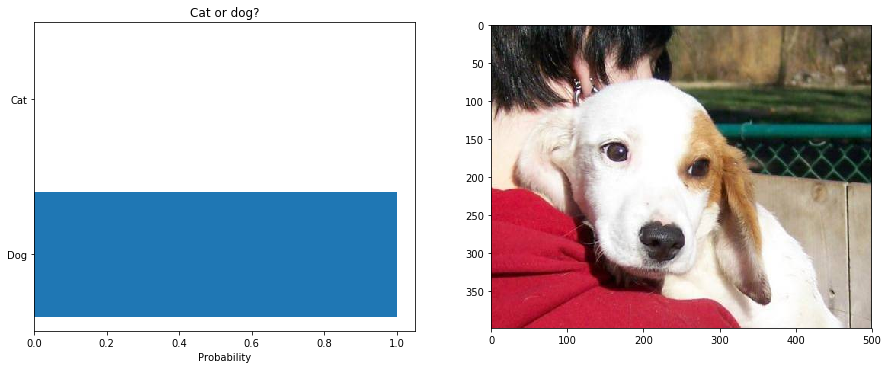

In [12]:
plot_cat_dog([pred_cat,pred_dog]) 